In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import os
root_dir = "/content/gdrive/MyDrive/데이터 분석 스터디/전처리_시각화_자료/7장"

# Checking if our specified directory exists
os.path.exists(root_dir)

Mounted at /content/gdrive


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 연습문제 04

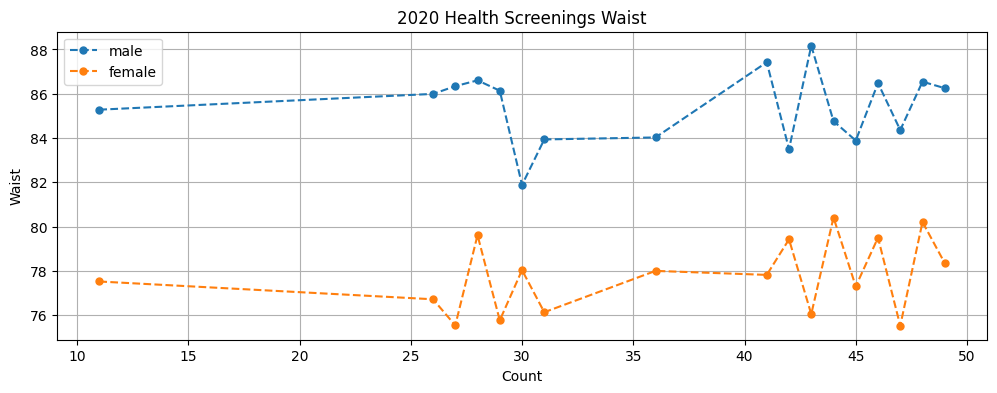

In [20]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data3=data.loc[:,['city_code','gender','waist']]

male_data=data3[data3['gender']==1].groupby('city_code')['waist'].mean()
female_data=data3[data3['gender']==2].groupby('city_code')['waist'].mean()

plt.figure(figsize=(12,4))
plt.plot(male_data,label='male', linestyle='--', marker='o', markersize='5')
plt.plot(female_data,label='female', linestyle='--', marker='o', markersize='5')

plt.xlabel('Count')
plt.ylabel('Waist')
plt.title('2020 Health Screenings Waist')
plt.legend()
plt.grid()
plt.show()

## 연습문제 05

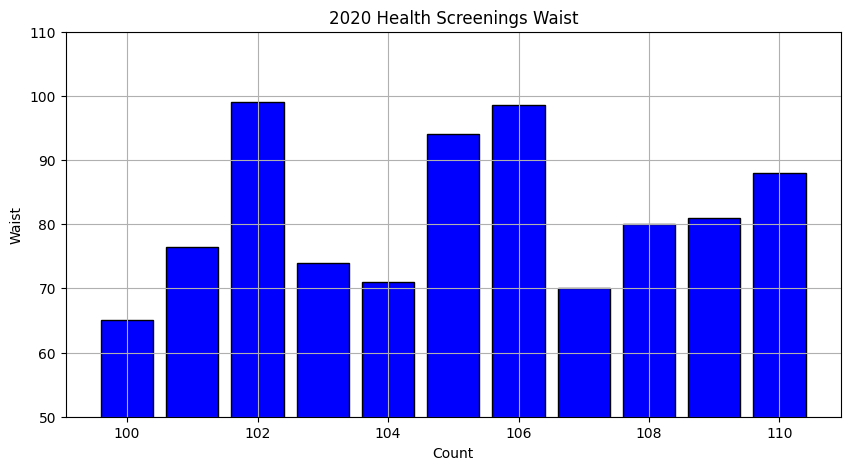

In [25]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data3=data.loc[:,['city_code','gender','waist']]

waistData = data3.loc[100:110, ['waist']]

plt.figure(figsize=(10, 5))

x_values = waistData.index
y_values = waistData['waist']

plt.bar(x_values, y_values, color='blue', edgecolor='black')

plt.ylim(50, 110)
plt.xlabel('Count')
plt.ylabel('Waist')
plt.title('2020 Health Screenings Waist')
plt.grid()
plt.show()

## 연습문제 06

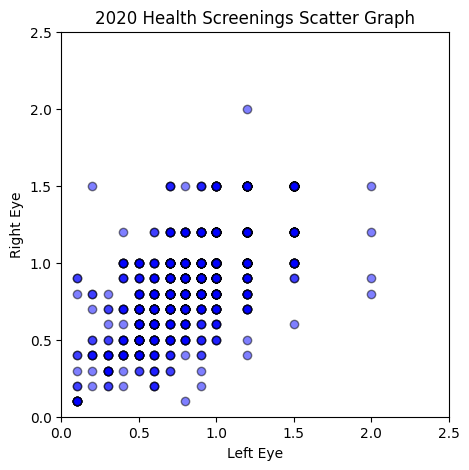

In [24]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
lEyeData=data['eye_left']
rEyeData=data['eye_right']

plt.figure(figsize=(5,5))

plt.scatter(lEyeData, rEyeData, color='blue', alpha=0.5, edgecolor='black')

plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('Left Eye')
plt.ylabel('Right Eye')
plt.title('2020 Health Screenings Scatter Graph')
plt.show()

## 연습문제 07

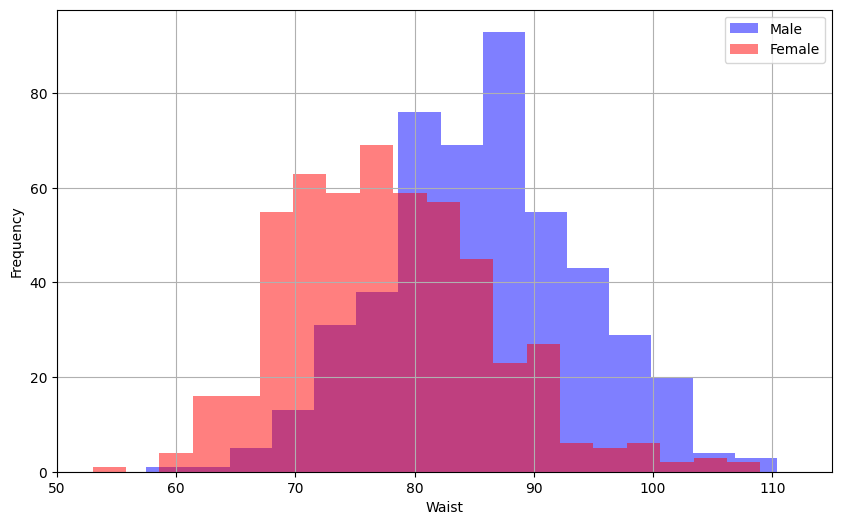

In [30]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data3=data.loc[:,['city_code','gender','waist']]

male_data=data3.loc[data3.gender==1,['gender','waist']]
female_data=data3.loc[data3.gender==2,['gender','waist']]

plt.figure(figsize=(10,6))
plt.hist(male_data['waist'], bins=20, color='blue', alpha=0.5, label='Male')
plt.hist(female_data['waist'], bins=20, color='red', alpha=0.5, label='Female')

plt.xlim(50,115)
plt.xlabel('Waist')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## 연습문제 08

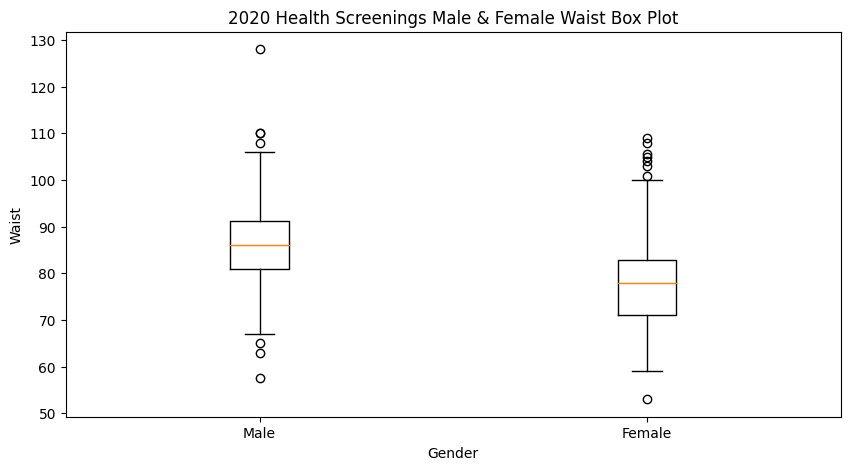

In [27]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data3=data.loc[:,['city_code','gender','waist']]

mandata=data3.loc[data3.gender==1, ['gender','waist']]
womandata=data3.loc[data3.gender==2, ['gender','waist']]

male=np.array(male_data['waist'], dtype=object)
female=np.array(female_data['waist'])

plt.figure(figsize=(10,5))

plt.boxplot([male, female], labels=['Male', 'Female'])

plt.xlabel('Gender')
plt.ylabel('Waist')
plt.title('2020 Health Screenings Male & Female Waist Box Plot')
plt.show()

## 연습문제 09

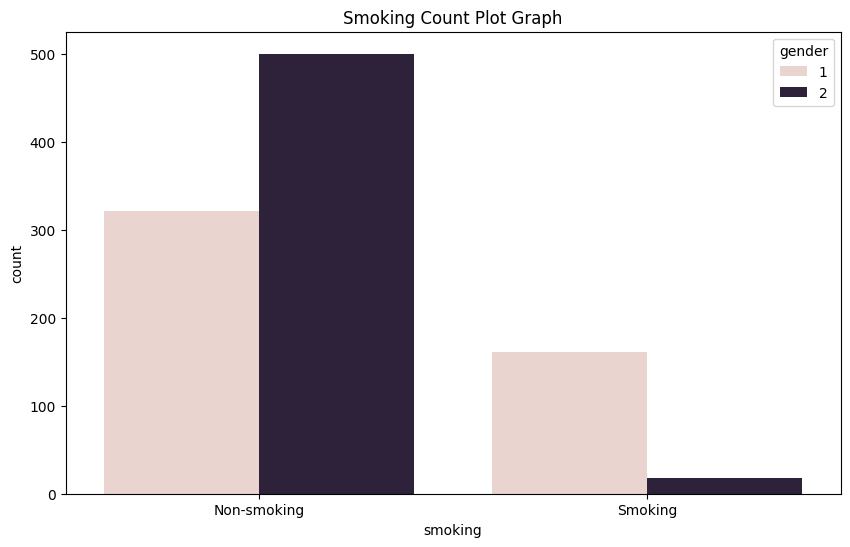

In [33]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data6=data.loc[:,['gender','height','weight','waist','drinking','smoking']]

data6.loc[data6['gender']==1, ['gender']]=='Male'
data6.loc[data6['gender']==2, ['gender']]=='Female'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2), ['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

smoking=data6.groupby(['gender','smoking'])['smoking'].count()
smoking=smoking.to_frame(name='count')
smoking=smoking.reset_index()

plt.figure(figsize=(10,6))

sns.countplot(data=data6, x='smoking',hue='gender')

plt.title('Smoking Count Plot Graph')
plt.show()

## 연습문제 10

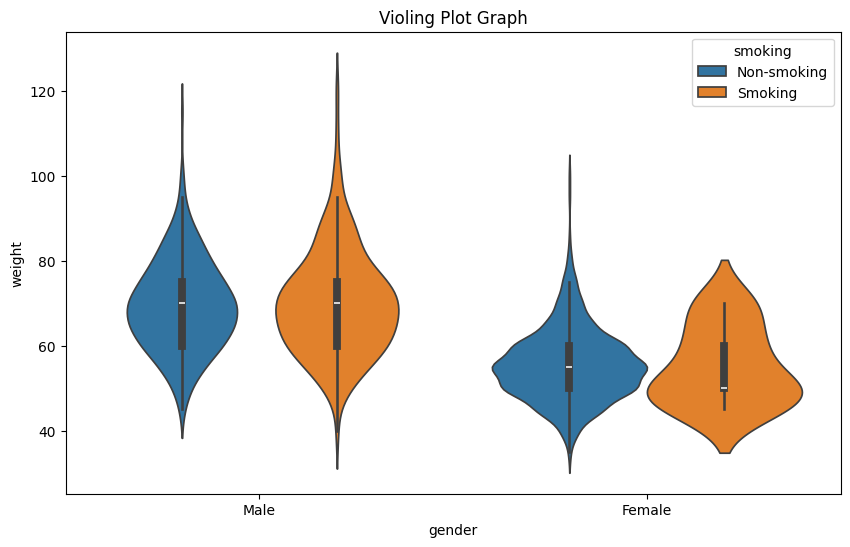

In [18]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data6=data.loc[:,['gender','height','weight','waist','drinking','smoking']]

data6.loc[data6['gender']==1, 'gender']='Male'
data6.loc[data6['gender']==2, 'gender']='Female'
data6.loc[(data6['smoking']==1) | (data6['smoking']==2), ['smoking']]='Non-smoking'
data6.loc[data6['smoking']==3,['smoking']]='Smoking'

smoking=data6.groupby(['gender','smoking'])['smoking'].count()
smoking=smoking.to_frame(name='count')
smoking=smoking.reset_index()

plt.figure(figsize=(10,6))
sns.violinplot(x='gender', y='weight', hue='smoking', data=data6, dodge=True)
plt.title('Violing Plot Graph')
plt.show()

## 연습문제 11

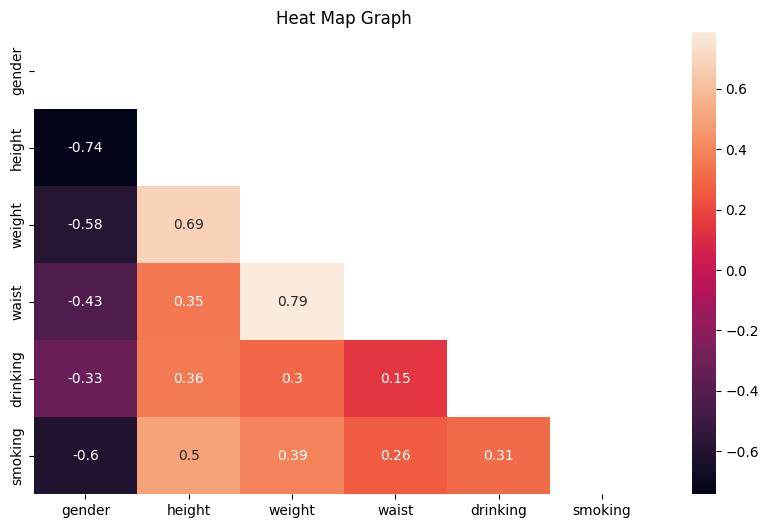

In [14]:
data=pd.read_excel(os.path.join(root_dir, 'health_screenings_2020_1000ea.xlsx'))
data6=data.loc[:,['gender','height','weight','waist','drinking','smoking']]

plt.figure(figsize=(10,6))

correlation_data6=data6.corr()
upp_mat=np.triu(correlation_data6)
sns.heatmap(correlation_data6, annot=True, mask=upp_mat)

plt.title('Heat Map Graph')
plt.show()